#Student Name: Rahul Deshmukh
#ECE 595 Machine Learning II
#Project 2: Autoencoders - Student Code

In [0]:
#Import necessary packages
import numpy as np, pickle as pkl
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras import backend as K
from keras.models import model_from_json
from google.colab import drive
drive.mount('/content/gdrive')

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


#Part 0: Importing and Normalizing Data

In [0]:
#Load MNIST data and normalize to [0,1]
(data_train, _), (data_test, _) = mnist.load_data()
data_train = data_train/255.0
data_test = data_test/255.0

11501568/11490434 [==============================] - 1s 0us/step


In [0]:
#Reshape training and testing data into 784-dimensional vectors
X_train= data_train.reshape(60000,784)
X_test= data_test.reshape(10000,784)

In [0]:
#Create autoencoder architecture
def deep_ae():
    model = Sequential()
    model.add(Dense(400,activation='relu',use_bias=True,kernel_initializer="uniform",input_dim=784))
    model.add(Dense(200,activation='relu',use_bias=True,kernel_initializer="uniform"))
    model.add(Dense(100,activation='relu',use_bias=True,kernel_initializer="uniform"))
    model.add(Dense(200,activation='relu',use_bias=True,kernel_initializer="uniform"))
    model.add(Dense(400,activation='relu',use_bias=True,kernel_initializer="uniform"))
    model.add(Dense(784,activation='relu',use_bias=True,kernel_initializer="uniform"))
    return model

#Create deep autoencoder graph
model_fcae = deep_ae()

#Compile model using an appropriate loss and optimizer algorithm
model_fcae.compile(loss="mean_squared_error",optimizer="adam")

#Train the model and assign training meta-data to a variable
num_epochs = 150
batch_size = 1024

model_fcae_history = model_fcae.fit(X_train,X_train,
                             validation_data = (X_test,X_test),
                             epochs = num_epochs,
                             batch_size = batch_size,
                             shuffle=True)
 
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions_fcae = model_fcae.predict(X_test)

#Obtain encoder representation of data
get_hl_fcae = K.function([model_fcae.layers[0].input], [model_fcae.layers[2].output]) #The third hidden layer is indexed at 2
model_fcae_hl = get_hl_fcae([X_test])[0]

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 3s 44us/step - loss: 0.0799 - val_loss: 0.0748
Epoch 2/150
60000/60000 [==============================] - 1s 23us/step - loss: 0.0724 - val_loss: 0.0642
Epoch 3/150
60000/60000 [==============================] - 1s 23us/step - loss: 0.0525 - val_loss: 0.0423
Epoch 4/150
60000/60000 [==============================] - 1s 23us/step - loss: 0.0379 - val_loss: 0.0334
Epoch 5/150
60000/60000 [==============================] - 1s 23us/step - loss: 0.0313 - val_loss: 0.0287
Epoch 6/150
60000/60000 [==============================] - 1s 23us/step - loss: 0.0277 - val_loss: 0.0259
Epoch 7/150
60000/60000 [==============================] - 1s 23us/step - loss: 0.0252 - val_loss: 0.0237
Epoch 8/150
60000/60000 [==============================] - 1s 23us/step - loss: 0.0225 - val_loss: 0.0211
Epoch 9/150
60000/60000 [==============================] - 1s 24us/step - loss: 0.0207 - val_loss: 0.0

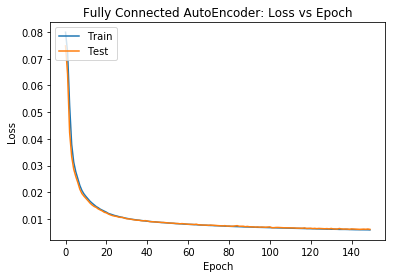

In [0]:
get_hl1_fcae = K.function([model_fcae.layers[0].input], [model_fcae.layers[0].output]) 
get_hl2_fcae = K.function([model_fcae.layers[0].input], [model_fcae.layers[1].output]) 
get_hl3_fcae = K.function([model_fcae.layers[0].input], [model_fcae.layers[2].output]) 
get_hl4_fcae = K.function([model_fcae.layers[0].input], [model_fcae.layers[3].output]) 
get_hl5_fcae = K.function([model_fcae.layers[0].input], [model_fcae.layers[4].output]) 

model_fcae_hl1 = get_hl1_fcae([X_test])[0]
model_fcae_hl2 = get_hl2_fcae([X_test])[0]
model_fcae_hl3 = get_hl3_fcae([X_test])[0]
model_fcae_hl4 = get_hl4_fcae([X_test])[0]
model_fcae_hl5 = get_hl5_fcae([X_test])[0]

#Plot loss vs epoch
#FILL THIS CODE BLOCK IN AND PRODUCE PLOT
plt.figure(1)
plt.plot(model_fcae_history.history['loss'])
plt.plot(model_fcae_history.history['val_loss'])
plt.title('Fully Connected AutoEncoder: Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

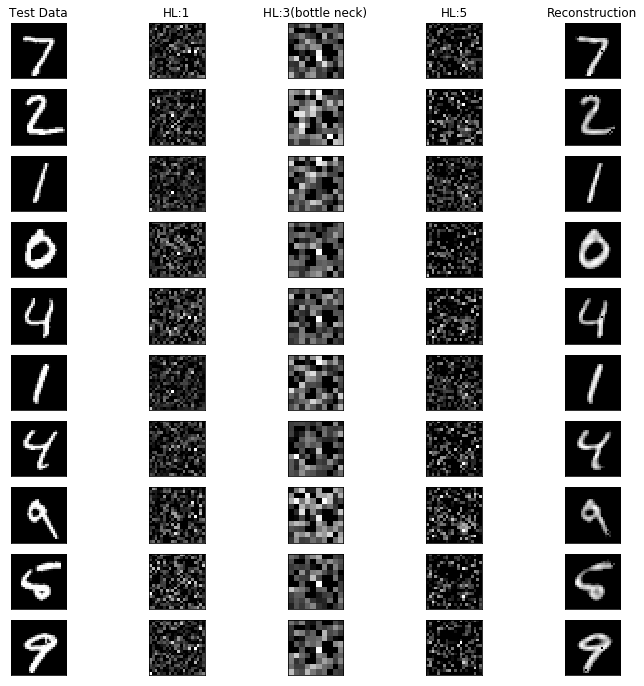

In [0]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
num_samples = 10
fig1,ax1 = plt.subplots(num_samples,5)
fig1.set_size_inches(12,12)
titles=['Test Data','HL:1','HL:3(bottle neck)','HL:5','Reconstruction']
for i in range(5): ax1[0,i].set_title(titles[i])
for i in range(num_samples):
  # test data
  ax1[i,0].imshow(X_test[i].reshape(28,28),cmap=plt.cm.gray)
  ax1[i,0].get_xaxis().set_visible(False)
  ax1[i,0].get_yaxis().set_visible(False)
  # hidden layer representation:1
  ax1[i,1].imshow(model_fcae_hl1[i].reshape(20,20),cmap=plt.cm.gray)
  ax1[i,1].get_xaxis().set_visible(False)
  ax1[i,1].get_yaxis().set_visible(False)

  # hidden layer representation:3
  ax1[i,2].imshow(model_fcae_hl3[i].reshape(10,10),cmap=plt.cm.gray)
  ax1[i,2].get_xaxis().set_visible(False)
  ax1[i,2].get_yaxis().set_visible(False)
  
  # hidden layer representation:5
  ax1[i,3].imshow(model_fcae_hl5[i].reshape(20,20),cmap=plt.cm.gray)
  ax1[i,3].get_xaxis().set_visible(False)
  ax1[i,3].get_yaxis().set_visible(False)  
  # reconstruction
  ax1[i,4].imshow(reconstructions_fcae[i].reshape(28,28),cmap=plt.cm.gray)
  ax1[i,4].get_xaxis().set_visible(False)
  ax1[i,4].get_yaxis().set_visible(False)
  
plt.show()

#Part 2: Deep Convolutional AutoEncoder

In [0]:
#Reshape data into 2-D signals and account for grayscale channel in each image
Data_Train = data_train.reshape(60000,28,28,1)
Data_Test = data_test.reshape(10000,28,28,1)

In [0]:
#Create Convolutional AutoEncoder Architecture
def cae():
    model = Sequential()

    model.add(Conv2D(16,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
    model.add(Conv2D(8,kernel_size=3,activation='relu',padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2),padding='same'))
    model.add(Conv2D(8,kernel_size=3,activation='relu',padding='same'))
    model.add(UpSampling2D((2,2)))
    model.add(Conv2D(16,kernel_size=3,activation='relu',padding='same'))
    model.add(UpSampling2D((2,2)))
    model.add(Conv2D(1,kernel_size=3,activation='relu',padding='same'))
    return model

#Create deep autoencoder graph
model_convae = cae()

#Compile model using an appropriate loss and optimizer algorithm
model_convae.compile(loss="mean_squared_error",optimizer="adam")

#Train the model and assign training meta-data to a variable
num_epochs = 150
batch_size = 1024

model_convae_history = model_convae.fit(Data_Train,Data_Train,
                             validation_data = (Data_Test,Data_Test),
                             epochs = num_epochs,
                             batch_size = batch_size,
                             shuffle=True)
 
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions_convae = model_convae.predict(Data_Test)


#Obtain encoder representation of data
get_hl = K.function([model_convae.layers[0].input], [model_convae.layers[3].output])  # The fourth hidden layer are indexed at 3
conv_ae_hl = get_hl([Data_Test])[0]

# save data
model_convae.save_weights('model_convae_wts.h5')
with open('model_convae_arch.json','w') as f:
  f.write(model_convae.to_json())
  
with open('model_convae_history.pkl', 'wb') as f:  
  pkl.dump(model_convae_history.history, f)
  
!cp model_convae_wts.h5 /content/gdrive/My\ Drive/ML2/Project-2/
!cp model_convae_arch.json /content/gdrive/My\ Drive/ML2/Project-2/
!cp model_convae_history.pkl /content/gdrive/My\ Drive/ML2/Project-2/


Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 3s 56us/step - loss: 0.0542 - val_loss: 0.0279
Epoch 2/150
60000/60000 [==============================] - 3s 45us/step - loss: 0.0208 - val_loss: 0.0155
Epoch 3/150
60000/60000 [==============================] - 3s 45us/step - loss: 0.0135 - val_loss: 0.0116
Epoch 4/150
60000/60000 [==============================] - 3s 44us/step - loss: 0.0110 - val_loss: 0.0100
Epoch 5/150
60000/60000 [==============================] - 3s 45us/step - loss: 0.0097 - val_loss: 0.0091
Epoch 6/150
60000/60000 [==============================] - 3s 44us/step - loss: 0.0090 - val_loss: 0.0085
Epoch 7/150
60000/60000 [==============================] - 3s 44us/step - loss: 0.0084 - val_loss: 0.0080
Epoch 8/150
60000/60000 [==============================] - 3s 44us/step - loss: 0.0079 - val_loss: 0.0076
Epoch 9/150
60000/60000 [==============================] - 3s 44us/step - loss: 0.0076 - val_loss: 0.0

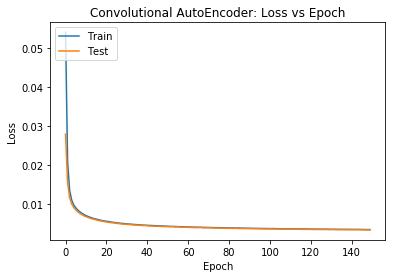

In [0]:
# load data 
!cp /content/gdrive/My\ Drive/ML2/Project-2/model_convae_wts.h5 ./
!cp  /content/gdrive/My\ Drive/ML2/Project-2/model_convae_arch.json ./
!cp  /content/gdrive/My\ Drive/ML2/Project-2/model_convae_history.pkl ./

with open('model_convae_arch.json','r') as f:
  model_convae = model_from_json(f.read())
  
model_convae.load_weights('model_convae_wts.h5')

with open('model_convae_history.pkl', 'rb') as f:  
  model_convae_history = pkl.load(f)

#Plot loss vs epoch
try:
  plt.plot(model_convae_history.history['loss'])
  plt.plot(model_convae_history.history['val_loss'])
except:
  plt.plot(model_convae_history['loss'])
  plt.plot(model_convae_history['val_loss'])
  
plt.title('Convolutional AutoEncoder: Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [0]:
get_hl_convae1 = K.function([model_convae.layers[0].input], [model_convae.layers[0].output])  
get_hl_convae2 = K.function([model_convae.layers[0].input], [model_convae.layers[1].output])  
get_hl_convae3 = K.function([model_convae.layers[0].input], [model_convae.layers[2].output])  
get_hl_convae4 = K.function([model_convae.layers[0].input], [model_convae.layers[3].output])  
get_hl_convae5 = K.function([model_convae.layers[0].input], [model_convae.layers[4].output])  
get_hl_convae6 = K.function([model_convae.layers[0].input], [model_convae.layers[5].output])  
get_hl_convae7 = K.function([model_convae.layers[0].input], [model_convae.layers[6].output])  
get_hl_convae8 = K.function([model_convae.layers[0].input], [model_convae.layers[7].output])  
get_hl_convae9 = K.function([model_convae.layers[0].input], [model_convae.layers[8].output])  

model_convae_hl1 = get_hl_convae1([Data_Test])[0]
model_convae_hl2 = get_hl_convae2([Data_Test])[0]
model_convae_hl3 = get_hl_convae3([Data_Test])[0]
model_convae_hl4 = get_hl_convae4([Data_Test])[0]
model_convae_hl5 = get_hl_convae5([Data_Test])[0]
model_convae_hl6 = get_hl_convae6([Data_Test])[0]
model_convae_hl7 = get_hl_convae7([Data_Test])[0]
model_convae_hl8 = get_hl_convae8([Data_Test])[0]
model_convae_hl9 = get_hl_convae9([Data_Test])[0]

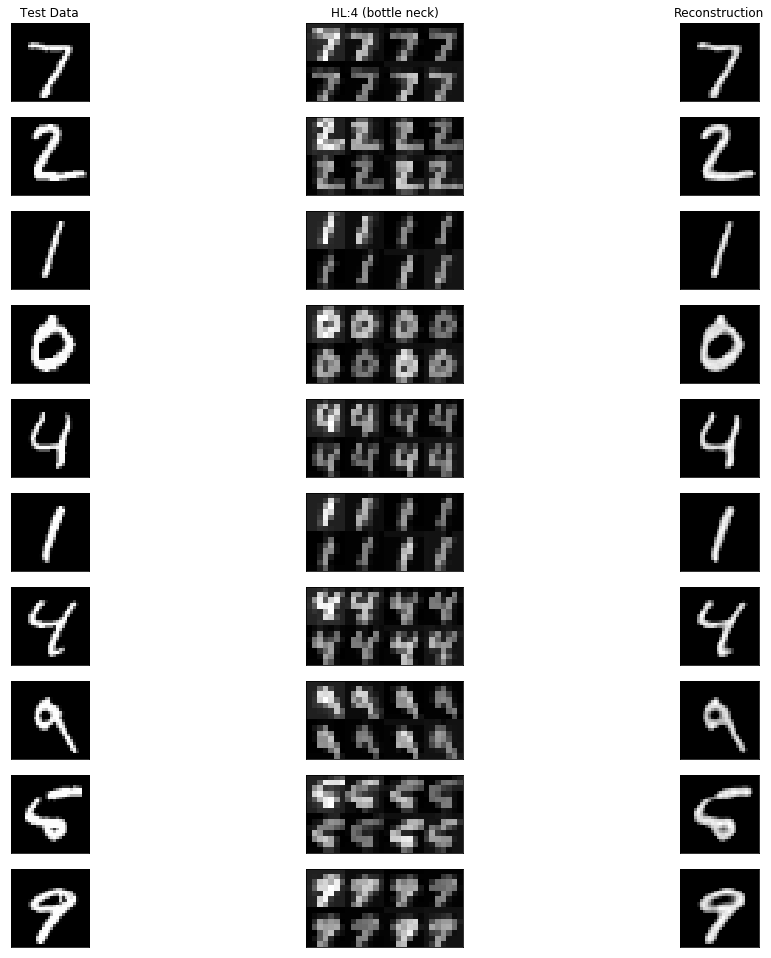

In [0]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
num_samples = 10
fig,ax = plt.subplots(num_samples,3)
fig.set_size_inches(17,17)

titles=['Test Data','HL:4 (bottle neck)','Reconstruction']
for i in range(3):ax[0,i].set_title(titles[i])

for i in range(num_samples):
  # test data
  ax[i,0].imshow(data_test[i],cmap=plt.cm.gray)
  ax[i,0].get_xaxis().set_visible(False)
  ax[i,0].get_yaxis().set_visible(False)
  
  # hidden layer representation:4
  f = model_convae_hl4[i].shape[0]
  m = int(model_convae_hl4[i].shape[2]/4)
  n = int(model_convae_hl4[i].shape[2]/(model_convae_hl4[i].shape[2]/4))
  temp = np.zeros((f*m,f*n))
  for j in range(m):
          for k in range(n):
                   temp[f*j:f*(j+1),f*k:f*(k+1)] = model_convae_hl4[i][:,:,j*m+k]
  ax[i,1].imshow(temp,cmap=plt.cm.gray)
  #ax[i,1].imshow(model_convae_hl4[i].reshape(28,14),cmap=plt.cm.gray)
  ax[i,1].get_xaxis().set_visible(False)
  ax[i,1].get_yaxis().set_visible(False)
  
  
  # reconstruction
  ax[i,2].imshow(reconstructions_convae[i][:,:,0],cmap=plt.cm.gray)
  ax[i,2].get_xaxis().set_visible(False)
  ax[i,2].get_yaxis().set_visible(False)
  
plt.show()


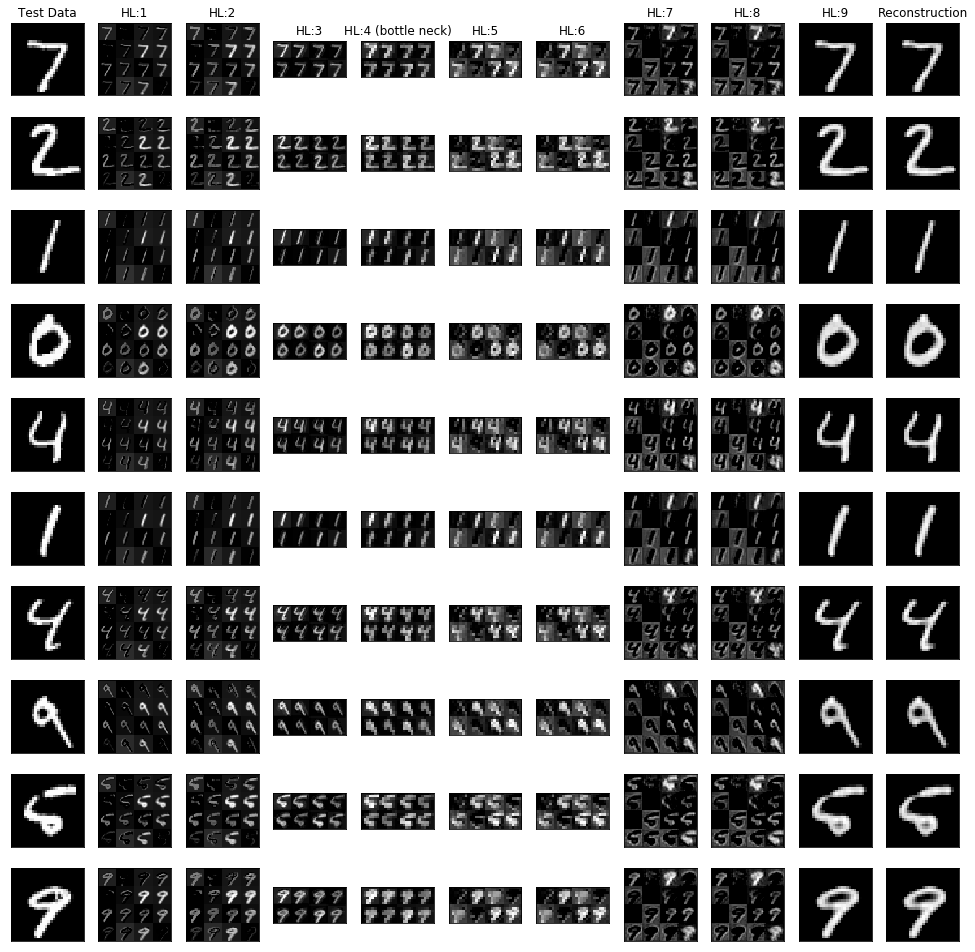

In [0]:
#Show samples of 10 images, their hidden layer representations, and their reconstructions
num_samples = 10
fig2,ax2 = plt.subplots(num_samples,11)
fig2.set_size_inches(17,17)

titles=['Test Data','HL:1','HL:2','HL:3','HL:4 (bottle neck)','HL:5','HL:6','HL:7','HL:8','HL:9','Reconstruction']
for i in range(11):ax2[0,i].set_title(titles[i])
  
for i in range(num_samples):
  # test data
  ax2[i,0].imshow(data_test[i],cmap=plt.cm.gray)
  ax2[i,0].get_xaxis().set_visible(False)
  ax2[i,0].get_yaxis().set_visible(False)
  
  # hidden layer representation:1
  f = model_convae_hl1[i].shape[0]
  m = int(model_convae_hl1[i].shape[2]/4)
  n = int(model_convae_hl1[i].shape[2]/(model_convae_hl1[i].shape[2]/4))
  temp = np.zeros((f*m,f*n))

  for j in range(m):
          for k in range(n):
                   temp[f*j:f*(j+1),f*k:f*(k+1)] = model_convae_hl1[i][:,:,j*m+k]
          
  #ax2[i,1].imshow(model_convae_hl1[i][:,:,k],cmap=plt.cm.gray)
  ax2[i,1].imshow(temp,cmap=plt.cm.gray)
  ax2[i,1].get_xaxis().set_visible(False)
  ax2[i,1].get_yaxis().set_visible(False)
  
  # hidden layer representation:2
  f = model_convae_hl2[i].shape[0]
  m = int(model_convae_hl2[i].shape[2]/4)
  n = int(model_convae_hl2[i].shape[2]/(model_convae_hl2[i].shape[2]/4))
  temp = np.zeros((f*m,f*n))

  for j in range(m):
          for k in range(n):
                   temp[f*j:f*(j+1),f*k:f*(k+1)] = model_convae_hl2[i][:,:,j*m+k]
  #ax2[i,2].imshow(model_convae_hl2[i][:,:,k],cmap=plt.cm.gray)
  ax2[i,2].imshow(temp,cmap=plt.cm.gray)
  ax2[i,2].get_xaxis().set_visible(False)
  ax2[i,2].get_yaxis().set_visible(False)

  # hidden layer representation:3
  f = model_convae_hl3[i].shape[0]
  m = int(model_convae_hl3[i].shape[2]/4)
  n = int(model_convae_hl3[i].shape[2]/(model_convae_hl3[i].shape[2]/4))
  temp = np.zeros((f*m,f*n))

  for j in range(m):
          for k in range(n):
                   temp[f*j:f*(j+1),f*k:f*(k+1)] = model_convae_hl3[i][:,:,j*m+k]
  #ax2[i,3].imshow(model_convae_hl3[i][:,:,k],cmap=plt.cm.gray)
  ax2[i,3].imshow(temp,cmap=plt.cm.gray)
  ax2[i,3].get_xaxis().set_visible(False)
  ax2[i,3].get_yaxis().set_visible(False)
  
  # hidden layer representation:4
  f = model_convae_hl4[i].shape[0]
  m = int(model_convae_hl4[i].shape[2]/4)
  n = int(model_convae_hl4[i].shape[2]/(model_convae_hl4[i].shape[2]/4))
  temp = np.zeros((f*m,f*n))

  for j in range(m):
          for k in range(n):
                   temp[f*j:f*(j+1),f*k:f*(k+1)] = model_convae_hl4[i][:,:,j*m+k]
  #ax2[i,4].imshow(model_convae_hl4[i][:,:,0],cmap=plt.cm.gray)
  ax2[i,4].imshow(temp,cmap=plt.cm.gray)
  ax2[i,4].get_xaxis().set_visible(False)
  ax2[i,4].get_yaxis().set_visible(False)
  
  # hidden layer representation:5
  f = model_convae_hl5[i].shape[0]
  m = int(model_convae_hl5[i].shape[2]/4)
  n = int(model_convae_hl5[i].shape[2]/(model_convae_hl5[i].shape[2]/4))
  temp = np.zeros((f*m,f*n))

  for j in range(m):
          for k in range(n):
                   temp[f*j:f*(j+1),f*k:f*(k+1)] = model_convae_hl5[i][:,:,j*m+k]
  #ax2[i,5].imshow(model_convae_hl5[i][:,:,k],cmap=plt.cm.gray)
  ax2[i,5].imshow(temp,cmap=plt.cm.gray)
  ax2[i,5].get_xaxis().set_visible(False)
  ax2[i,5].get_yaxis().set_visible(False)  
  
  # hidden layer representation:6
  f = model_convae_hl6[i].shape[0]
  m = int(model_convae_hl6[i].shape[2]/4)
  n = int(model_convae_hl6[i].shape[2]/(model_convae_hl6[i].shape[2]/4))
  temp = np.zeros((f*m,f*n))

  for j in range(m):
          for k in range(n):
                   temp[f*j:f*(j+1),f*k:f*(k+1)] = model_convae_hl6[i][:,:,j*m+k]
  #ax2[i,6].imshow(model_convae_hl6[i][:,:,k],cmap=plt.cm.gray)
  ax2[i,6].imshow(temp,cmap=plt.cm.gray)
  ax2[i,6].get_xaxis().set_visible(False)
  ax2[i,6].get_yaxis().set_visible(False)
  
  # hidden layer representation:7
  f = model_convae_hl7[i].shape[0]
  m = int(model_convae_hl7[i].shape[2]/4)
  n = int(model_convae_hl7[i].shape[2]/(model_convae_hl7[i].shape[2]/4))
  temp = np.zeros((f*m,f*n))

  for j in range(m):
          for k in range(n):
                   temp[f*j:f*(j+1),f*k:f*(k+1)] = model_convae_hl7[i][:,:,j*m+k]
  #ax2[i,7].imshow(model_convae_hl7[i][:,:,k],cmap=plt.cm.gray)
  ax2[i,7].imshow(temp,cmap=plt.cm.gray)
  ax2[i,7].get_xaxis().set_visible(False)
  ax2[i,7].get_yaxis().set_visible(False)
  
  # hidden layer representation:8
  f = model_convae_hl8[i].shape[0]
  m = int(model_convae_hl8[i].shape[2]/4)
  n = int(model_convae_hl8[i].shape[2]/(model_convae_hl8[i].shape[2]/4))
  temp = np.zeros((f*m,f*n))

  for j in range(m):
          for k in range(n):
                   temp[f*j:f*(j+1),f*k:f*(k+1)] = model_convae_hl8[i][:,:,j*m+k]
  #ax2[i,8].imshow(model_convae_hl8[i][:,:,k],cmap=plt.cm.gray)
  ax2[i,8].imshow(temp,cmap=plt.cm.gray)
  ax2[i,8].get_xaxis().set_visible(False)
  ax2[i,8].get_yaxis().set_visible(False)
  
  # hidden layer representation:9
  ax2[i,9].imshow(model_convae_hl9[i][:,:,0],cmap=plt.cm.gray)
  ax2[i,9].get_xaxis().set_visible(False)
  ax2[i,9].get_yaxis().set_visible(False)
  
  # reconstruction
  ax2[i,10].imshow(reconstructions_convae[i][:,:,0],cmap=plt.cm.gray)
  ax2[i,10].get_xaxis().set_visible(False)
  ax2[i,10].get_yaxis().set_visible(False)
  
plt.show()

#Part 3: Denoising AutoEncoder

In [0]:
#Inject noise into testing data
noise_factor = 0.25
data_train_noisy = data_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_train.shape)
data_test_noisy = data_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_test.shape)

#Clip to stay within valid (normalized) pixel range
data_train_noisy = np.clip(data_train_noisy, 0., 1.)
data_test_noisy = np.clip(data_test_noisy, 0., 1.)

#Reshape data to comply with input of denoising autoencoder
noisy_X_train = data_train_noisy.reshape(60000,784)
noisy_X_test = data_test_noisy.reshape(10000,784)

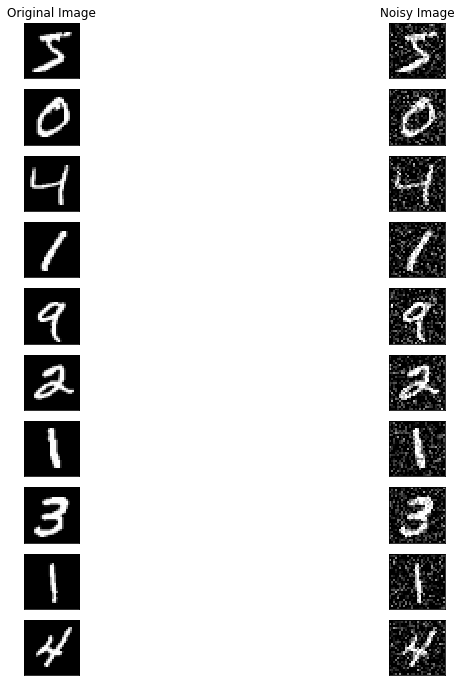

In [0]:
#Show samples of 10 original images and their corrsponding noisy counterparts from the training set
num_samples = 10

fig3,ax3=plt.subplots(num_samples,2)

fig3.set_size_inches(12,12)
titles=['Original Image','Noisy Image']

for i in range(2): ax3[0,i].set_title(titles[i])
  
for i in range(num_samples):
  ax3[i,0].imshow(X_train[i].reshape(28,28),cmap=plt.cm.gray)
  ax3[i,0].get_xaxis().set_visible(False)
  ax3[i,0].get_yaxis().set_visible(False)
  
  ax3[i,1].imshow(noisy_X_train[i].reshape(28,28),cmap=plt.cm.gray)
  ax3[i,1].get_xaxis().set_visible(False)
  ax3[i,1].get_yaxis().set_visible(False)

In [0]:
#Create denoising autoencoder architecture
def dae():
    model = Sequential()
    model.add(Dense(400,activation='relu',use_bias=True,kernel_initializer="uniform",input_dim=784))
    model.add(Dense(200,activation='relu',use_bias=True,kernel_initializer="uniform"))
    model.add(Dense(100,activation='relu',use_bias=True,kernel_initializer="uniform"))
    model.add(Dense(200,activation='relu',use_bias=True,kernel_initializer="uniform"))
    model.add(Dense(400,activation='relu',use_bias=True,kernel_initializer="uniform"))
    model.add(Dense(784,activation='relu',use_bias=True,kernel_initializer="uniform"))
    return model
  
model_dae = dae()
  
#Compile the DAE
model_dae.compile(loss='mean_squared_error',optimizer='adam')

#Train the model and assign training meta-data to a variable
num_epochs = 150
batch_size = 1024

model_dae_history = model_dae.fit(noisy_X_train,X_train,
                             validation_data = (noisy_X_test,X_test),
                             epochs = num_epochs,
                             batch_size = batch_size,
                             shuffle=True)
 
#Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstructions_dae = model_dae.predict(noisy_X_test)


#Generate denoised versions of noisy inputs



Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 7s 117us/step - loss: 0.0776 - val_loss: 0.0712
Epoch 2/150
60000/60000 [==============================] - 6s 107us/step - loss: 0.0702 - val_loss: 0.0661
Epoch 3/150
60000/60000 [==============================] - 6s 108us/step - loss: 0.0571 - val_loss: 0.0499
Epoch 4/150
60000/60000 [==============================] - 6s 107us/step - loss: 0.0451 - val_loss: 0.0403
Epoch 5/150
60000/60000 [==============================] - 6s 108us/step - loss: 0.0376 - val_loss: 0.0343
Epoch 6/150
60000/60000 [==============================] - 6s 107us/step - loss: 0.0325 - val_loss: 0.0304
Epoch 7/150
60000/60000 [==============================] - 6s 107us/step - loss: 0.0293 - val_loss: 0.0278
Epoch 8/150
60000/60000 [==============================] - 6s 107us/step - loss: 0.0271 - val_loss: 0.0261
Epoch 9/150
60000/60000 [==============================] - 6s 107us/step - loss: 0.0253 - val_

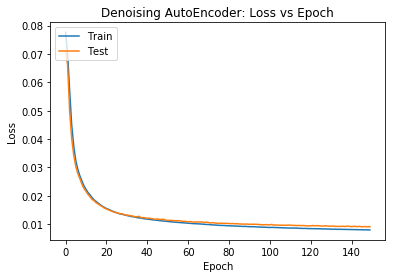

In [0]:
#Plot loss vs epoch
plt.plot(model_dae_history.history['loss'])
plt.plot(model_dae_history.history['val_loss'])
plt.title('Denoising AutoEncoder: Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

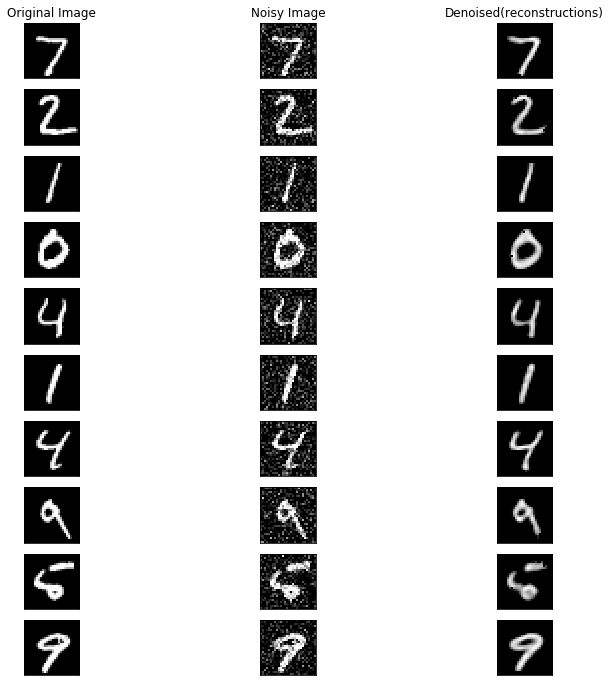

In [0]:
#Show samples of 10 original images, their noisy counterparts, and their de-noised images from the testing set

num_samples = 10
titles=['Original Image','Noisy Image','Denoised(reconstructions)']

fig4,ax4 = plt.subplots(num_samples,3)
fig4.set_size_inches(12,12)

for i in range(3): ax4[0,i].set_title(titles[i])
  
for i in range(num_samples):
  # test data
  ax4[i,0].imshow(X_test[i].reshape(28,28),cmap=plt.cm.gray)
  ax4[i,0].get_xaxis().set_visible(False)
  ax4[i,0].get_yaxis().set_visible(False)
  
  # noisy test data
  ax4[i,1].imshow(noisy_X_test[i].reshape(28,28),cmap=plt.cm.gray)
  ax4[i,1].get_xaxis().set_visible(False)
  ax4[i,1].get_yaxis().set_visible(False)

  # reconstruction
  ax4[i,2].imshow(reconstructions_dae[i].reshape(28,28),cmap=plt.cm.gray)
  ax4[i,2].get_xaxis().set_visible(False)
  ax4[i,2].get_yaxis().set_visible(False)
  
plt.show()